#### KMeans Clustering
---
K-Means is an unsupervised learning algorithm that **groups similar data points together**.

In [1]:
import pandas as pd
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
data = datasets.load_wine(as_frame=True)

In [2]:
df =pd.DataFrame(data.data, columns=data.feature_names)
df["Wine Status"] = data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Wine Status
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


Finding if KMeans is useful for this dataset.<br>
* Dataset that suit K-Means best:
- Clusters are **spherical**
- Clusters are **well separated**
- **Similar** cluster sizes

Our dataset is not aligning with these conditions, but still we try to work with to (just for learning)

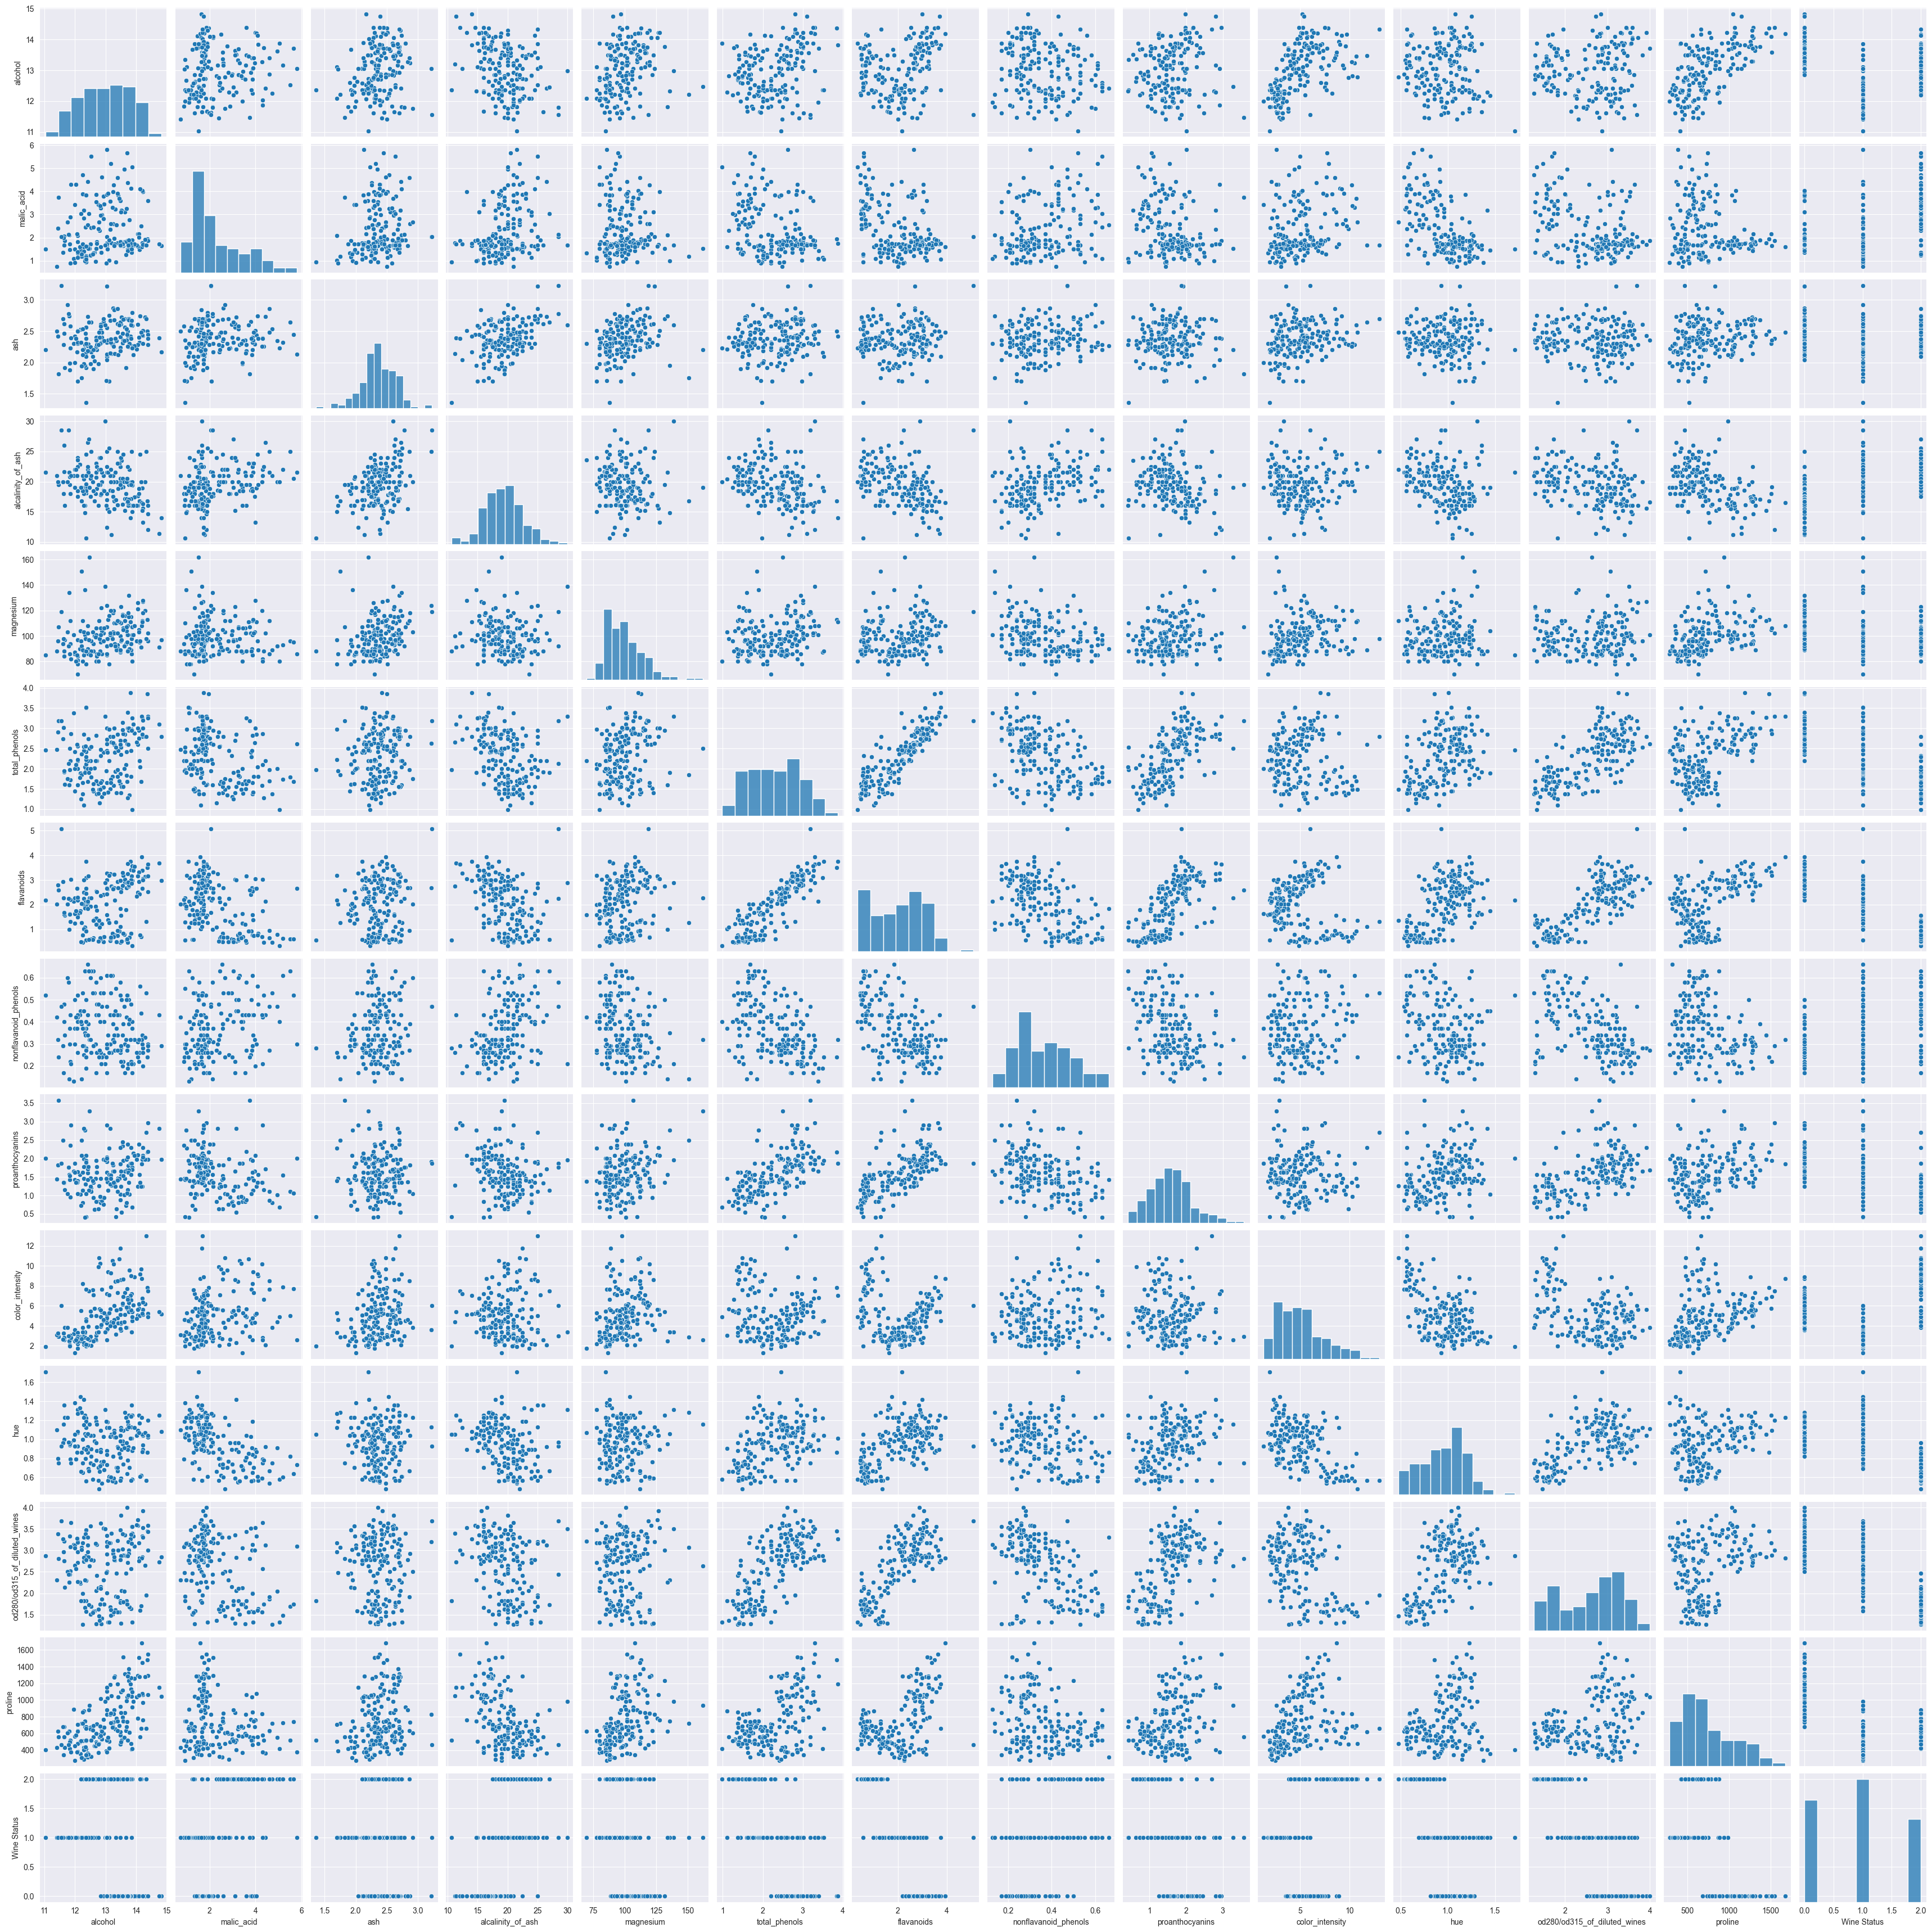

In [3]:
sns.pairplot(df)

In [4]:
X = df.drop(["Wine Status"], axis=1)
y = df["Wine Status"]

##### Scaling of data

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

#### The **Elbow Method**
---
The Elbow Method is a simple way to choose the best value of K (number of clusters) in K-Means.

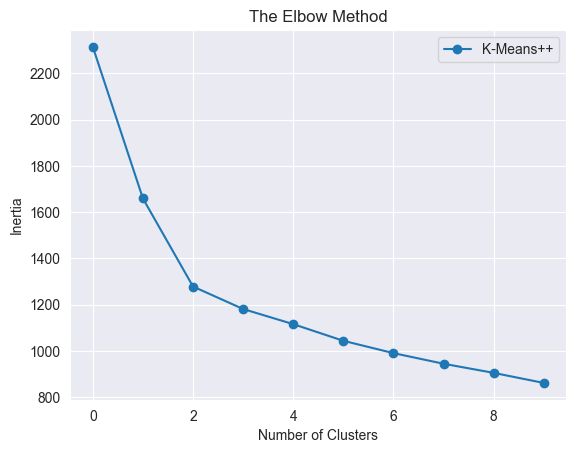

In [6]:
from sklearn.cluster import KMeans
wss=[]
label = []
for i in range(1,11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10)
    km.fit(X)
    label.append(km.labels_)
    wss.append(km.inertia_)
plt.plot(wss, label="K-Means++", marker='o')
plt.title("The Elbow Method")
plt.legend()
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Best k-value is 2, therefore value of **n_clusters = 2**

In [7]:
km_cluster = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=10)
km_cluster.fit(X)
lab = km_cluster.labels_
lab

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

#### Silhouette Score
---
The Silhouette Score tells you how good your clustering is.
- **Score ≈ +1 (GOOD)**
- **Score ≈ 0 (MEH)**
- **Score < 0 (BAD)**

Our score is 0.26 ≈ 0, therefore K-Means was not suitable for this dataset as we discussed while plotting

In [8]:
from sklearn import metrics
metrics.silhouette_score(X, lab)

0.26831340971052126